# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
## <font color="blue">Solução dos Exercícios</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

<font color='red'> Recomendamos fortemente resolver os exercícios sem consultar as soluções antecipadamente </font>

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo.

In [2]:
# Lendo o documento como uma string
import os  # os é um módulo que permite, de maneira simples, usar funcionalidades dependentes do sistema operacional
import glob  # glob é um pacote que permite varrer arquivos e diretorios utilizando sintaxe linux

files = glob.glob("DocCol2/*")

docs = {}
for fname in files:
    with open(fname,'r') as f:
        key = fname.split(os.sep)[-1]
        docs[key] = f.read() 
        
print(docs.keys())

dict_keys(['ch42', 'gr19', 'ch5', 'ch23', 'ch1', 'gr24', 'ch33', 'au6', 'ch20', 'ch39', 'ch36', 'gr10', 'ch2', 'au13', 'gr2', 'gr9', 'gr23', 'gr21', 'ch30', 'gr12', 'ch24', 'au12', 'gr14', 'au10', 'au9', 'ch12', 'ch37', 'ch21', 'ch7', 'au2', 'gr1', 'ch47', 'gr20', 'au3', 'ch16', 'ch28', 'gr6', 'gr15', 'ch29', 'ch18', 'gr13', 'gr22', 'gr16', 'ch50', 'gr4', 'ch41', 'ch43', 'au7', 'au1', 'gr17', 'ch31', 'ch17', 'ch38', 'au15', 'gr8', 'gr5', 'gr25', 'ch10', 'au14', 'ch32', 'ch27', 'ch22', 'ch44', 'ch14', 'ch48', 'ch4', 'ch13', 'ch8', 'ch34', 'ch15', 'ch3', 'ch26', 'ch49', 'ch40', 'ch46', 'ch45', 'au8', 'gr26', 'au4', 'au5', 'gr3', 'ch6', 'ch35', 'gr18', 'ch9', 'au11', 'ch11', 'gr11', 'ch25', 'gr7', 'ch19'])


### Exercício 2)
Percorra as strings armazenadas como valores no dicionário criado no exercício 1), concatenando-as em uma única string. Quebre a string gerada em uma lista de palavras.

**DICA**: Utilize <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>

In [3]:
import nltk
nltk.download('punkt')

words = ''
for k,s in docs.items():   # concatenando as strings
    words = words+s
    
words = nltk.word_tokenize(words)  # lista de palavras
print(words[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['From', ':', 'brother.roy', '@', 'almac.co.uk', '(', 'Brother', 'Roy', ')', 'Subject']


### Exercício 3)
Remova todas os "tokens" da lista criada no exercício 2) que sejam de comprimento 1 ou que contenham caractéres que não são letras do alfabeto. Faça com que todas as palavras estajam em letras minúsculas na lista resultante.

In [4]:
words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
print(words[:20])

['from', 'brother', 'roy', 'subject', 'rfd', 'this', 'is', 'rfd', 'on', 'proposal', 'for', 'newsgroup', 'which', 'would', 'promote', 'sharing', 'on', 'the', 'johannine', 'hours']


### Exercício 4)
Remova da lista de palavras resultante do exercício 3) todas as "stop_words". Lembre-se que as palavras são da língua inglesa.

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# lista das stop words
stop_words = stopwords.words('english')

words = [w for w in words if w not in stop_words]
print(words[:20])

['brother', 'roy', 'subject', 'rfd', 'rfd', 'proposal', 'newsgroup', 'would', 'promote', 'sharing', 'johannine', 'hours', 'proposed', 'month', 'monks', 'ecumenical', 'community', 'taize', 'pronounced', 'france']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Exercício 5) 
Faça a normalização léxica (stemming) das palavras da lista resultante do exercício 4) e remova palavras repetidas após a normalização. Quantas palavras foram removidas após a normalização léxica?

**Dica**: Utilize o método <font color='blue'>PorterStemmer</font> do pacote <font color='blue'>nltk.stem</font>

In [6]:
from nltk.stem import PorterStemmer

n_antes = len(words)
print(n_antes)
words = [PorterStemmer().stem(w) for w in words]
words = list(set(words))
n_depois = len(words)
print('Foram removidas ',n_antes-n_depois,' palavras')

#print(len(words),words[:20])

47253
Foram removidas  40472  palavras


### Exercício 6) 
Gere uma lista de palavras para cada documento armazenado como valores no dicionário do exercício 1) aplicando os passos dos exercícios de 2 a 5 para cada documento.
Porém, no passo 5 não remova palavras repetidas após a normalização léxica. Armazene o resultado em um novo dicionário onde as chaves são os nomes dos documentos, como no dicionário do exercício 1), e os valores são as listas de palavras geradas para cada documento.

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

In [8]:
stop_words = stopwords.words('english')
docsXwords = {}
for key, value in docs.items():
    words = nltk.word_tokenize(value)
    words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
    words = [w for w in words if w not in stop_words]
    words = [PorterStemmer().stem(w) for w in words]
    docsXwords[key] = words

### Exercício 7)
Utilize o dicionário contruído no exercício anterior para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos contidos no diretório `DocCol2`.

In [9]:
# unificando todas as palavras em uma única lista
corpus = [palavras for sublista in list(docsXwords.values()) for palavras in sublista]

# removendo repeticoes
corpus = list(set(corpus))

df_dXp = pd.DataFrame(data=np.zeros((len(list(docs.keys())),len(corpus))),
                      index = list(docs.keys()), columns = corpus)

for key,value in docsXwords.items():
    dtemp = dict(Counter(value))
    df_dXp.loc[key,list(dtemp.keys())] = list(dtemp.values())
    
print(df_dXp.head())

      almost  relationship  puf  mistaken  linkop  washington  manner  turn  \
ch42     1.0           0.0  0.0       0.0     0.0         0.0     0.0   0.0   
gr19     0.0           0.0  0.0       0.0     0.0         0.0     0.0   0.0   
ch5      2.0           0.0  0.0       0.0     0.0         0.0     0.0   0.0   
ch23     0.0           0.0  0.0       0.0     0.0         0.0     0.0   1.0   
ch1      1.0           0.0  0.0       0.0     0.0         0.0     0.0   1.0   

      fox  ampl  ...  statement  audiowork  nomin  scism  joe  weber  \
ch42  0.0   0.0  ...        0.0        0.0    0.0    0.0  0.0    0.0   
gr19  0.0   0.0  ...        0.0        0.0    0.0    0.0  0.0    0.0   
ch5   0.0   0.0  ...        1.0        0.0    0.0    0.0  0.0    0.0   
ch23  0.0   0.0  ...        1.0        0.0    0.0    0.0  0.0    0.0   
ch1   0.0   0.0  ...        0.0        0.0    0.0    0.0  0.0    0.0   

      landmark  profound  ley  psycholog  
ch42       0.0       0.0  0.0        0.0  
gr19  

### Exercício 8)
Utilizando PCA, projete a coleção de documentos no espaço gerado pelas duas direções principais da matriz Documentos $\times$ Palavras.

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# encontrando as classes dos documentos a partir das iniciais dos
# nomes dos documentos
docid = {}
for i,c in enumerate(df_dXp.index.values):
   if c[0:2] not in docid:
      docid[c[0:2]] = i
        
print(docid)
        
doc_class = [docid[c[0:2]] for c in df_dXp.index.values]

X = df_dXp.values
X = StandardScaler().fit_transform(X)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

{'ch': 0, 'gr': 1, 'au': 7}


### Exercício 9)
Visualize a projeção da coleção de documentos no espaço bidimensional gerado no exercício anterior e se necessário faça um zoom para melhor visualizar a distribuição dos documentos.

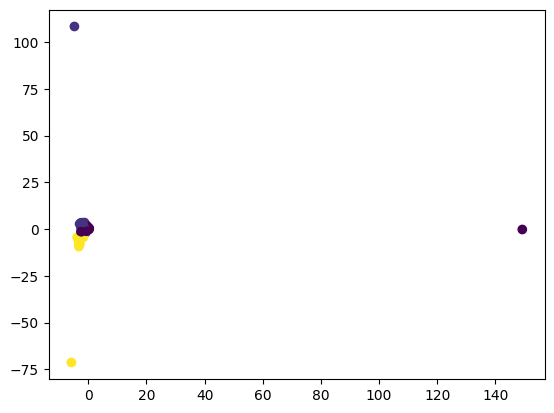

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)

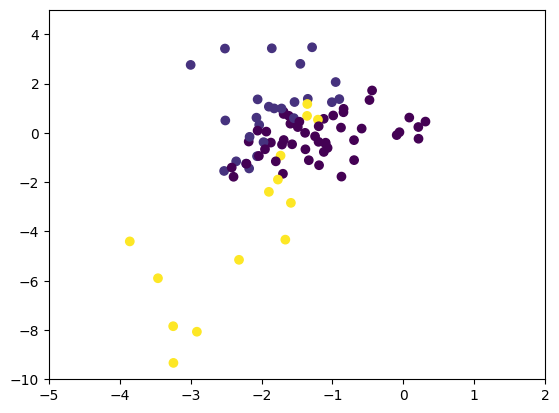

In [12]:
fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)

### Exercício 10)
Dado o documento `au8` (linha de rótulo `au8` no DataFrame Documentos $\times$ Palavras) e utilizando a distância "cosseno"  (cosseno entre dois vetores correspondendo a vetorização dos documentos), encontre qual o documento mais parecido com `au8`. Calcule o cosseno entre a linha representada por `au8` na matriz Documentos $\times$ Palavras e todas as outras linhas, tomando o maior valor como correspondendo ao documento mais parecido.
Repita a projeção realizada no exercício 8), ressaltando o documento `au8` e o documento mais parecido com ele. 

Documento mais parecido com au8:  au7


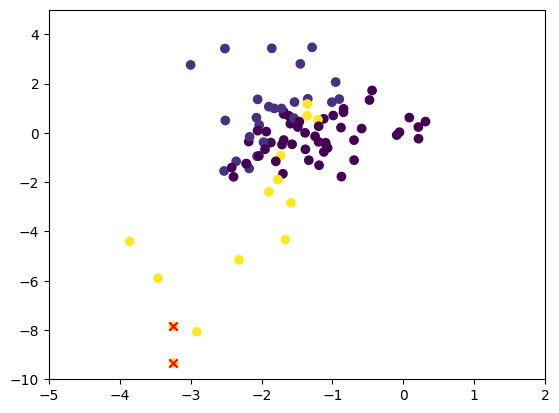

In [13]:
# encontrando o indice da linha de 'au8' no DataFrame
au8_id = np.argwhere(df_dXp.index.values=='au8')[0][0]

X = df_dXp.values
X = StandardScaler().fit_transform(X)

# calculando o cosseno utilizando a formula
# cos(x,y) = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cosau8 = np.apply_along_axis(lambda x: 
             np.dot(X[au8_id],x)/(np.linalg.norm(au8_id)*np.linalg.norm(x)),1,X)

# ordenando e pegando o maior valor (note que o elemento [-1] é o 
# próprio documento au8)
sim_au8_id = np.argsort(cosau8)[-2]
print('Documento mais parecido com au8: ',df_dXp.index.values[sim_au8_id])

fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)

# au8 e o documento mais parecido estão marcos com um X vermelho
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)
plt.scatter(Xpca[[au8_id,sim_au8_id],0],Xpca[[au8_id,sim_au8_id],1],marker='x',color='r')